In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

In [16]:
# Data leakage is impossible
data = pd.read_excel("data.xlsx")
df = data.copy()

In [17]:
df

,logTime,탁도,pH,수온,전기전도도,알칼리도,원수유입유량,정수지 탁도,응집지 pH,Co2 주입량(PV),침전수 탁도,PACS 투입량,PACS 투입률
0,2013/01/01 01:00,7.7017,7.6528,2.5044,314.8864,99.5002,2425.8030,0.0188,0.0000,0.0,0.0588,47.1580,19.440161
1,2013/01/01 02:00,7.2569,7.6505,2.4357,316.8224,99.5422,2423.7048,0.0190,0.0000,0.0,0.0304,46.6468,19.246073
2,2013/01/01 03:00,6.9190,7.6477,2.6493,318.1849,99.5546,2441.6343,0.0189,0.0000,0.0,0.0438,46.6316,19.098519
3,2013/01/01 04:00,6.9069,7.6480,2.3842,319.0541,99.5257,2442.0156,0.0189,0.0000,0.0,0.0926,46.9673,19.233006
4,2013/01/01 05:00,6.7461,7.6477,2.4758,320.2157,99.5107,2435.9121,0.0192,0.0000,0.0,0.0739,47.6310,19.553661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82348,2023/08/30 12:00,30.1667,6.8233,27.8489,167.2990,37.0192,1879.7292,0.0586,6.8634,0.0,0.7486,183.5250,97.633744
82349,2023/08/30 14:00,30.3615,6.8087,27.7631,166.6615,37.2736,1874.3229,0.0584,6.8585,0.0,0.8000,182.2000,97.208437
82350,2023/08/30 15:00,30.2833,6.7794,27.6840,165.5698,37.9352,1868.2188,0.0584,6.8657,0.0,0.7943,184.0750,98.529680
82351,2023/08/30 20:00,30.8281,6.6617,27.5372,158.5146,40.6888,1794.8958,0.0589,6.8617,0.0,0.7872,157.9750,88.013466


In [18]:
# Applying log transformation to the turbidity and coagulant dosage variables due to their wide range
df['log탁도'] = np.log1p(df['탁도'])
df['log_pacs'] = np.log1p(df['PACS 투입률'])
df

,logTime,탁도,pH,수온,전기전도도,알칼리도,원수유입유량,정수지 탁도,응집지 pH,Co2 주입량(PV),침전수 탁도,PACS 투입량,PACS 투입률,log탁도,log_pacs
0,2013/01/01 01:00,7.7017,7.6528,2.5044,314.8864,99.5002,2425.8030,0.0188,0.0000,0.0,0.0588,47.1580,19.440161,2.163518,3.017502
1,2013/01/01 02:00,7.2569,7.6505,2.4357,316.8224,99.5422,2423.7048,0.0190,0.0000,0.0,0.0304,46.6468,19.246073,2.111049,3.007961
2,2013/01/01 03:00,6.9190,7.6477,2.6493,318.1849,99.5546,2441.6343,0.0189,0.0000,0.0,0.0438,46.6316,19.098519,2.069265,3.000646
3,2013/01/01 04:00,6.9069,7.6480,2.3842,319.0541,99.5257,2442.0156,0.0189,0.0000,0.0,0.0926,46.9673,19.233006,2.067736,3.007315
4,2013/01/01 05:00,6.7461,7.6477,2.4758,320.2157,99.5107,2435.9121,0.0192,0.0000,0.0,0.0739,47.6310,19.553661,2.047189,3.023039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82348,2023/08/30 12:00,30.1667,6.8233,27.8489,167.2990,37.0192,1879.7292,0.0586,6.8634,0.0,0.7486,183.5250,97.633744,3.439350,4.591413
82349,2023/08/30 14:00,30.3615,6.8087,27.7631,166.6615,37.2736,1874.3229,0.0584,6.8585,0.0,0.8000,182.2000,97.208437,3.445581,4.587092
82350,2023/08/30 15:00,30.2833,6.7794,27.6840,165.5698,37.9352,1868.2188,0.0584,6.8657,0.0,0.7943,184.0750,98.529680,3.443084,4.600456
82351,2023/08/30 20:00,30.8281,6.6617,27.5372,158.5146,40.6888,1794.8958,0.0589,6.8617,0.0,0.7872,157.9750,88.013466,3.460350,4.488788


c:\Users\Administrator\anaconda3\envs\kwater\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4287333485346781


c:\Users\Administrator\anaconda3\envs\kwater\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4318248289714054


c:\Users\Administrator\anaconda3\envs\kwater\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.35761188069195154


c:\Users\Administrator\anaconda3\envs\kwater\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.3735121734118823


c:\Users\Administrator\anaconda3\envs\kwater\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.3644197740952056


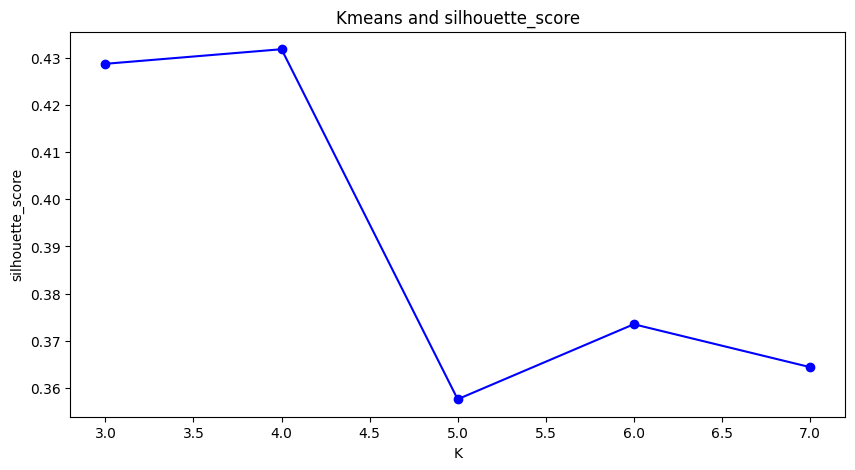

In [19]:
# Setting the range of K (from 3 to 7)
k_range = range(3, 8)
silhouette_scores = []

# Selecting specific columns for KMeans clustering
df_kmeans = df[['log탁도', 'log_pacs']]
# Standardizing the data
sc = StandardScaler()
df_sc = sc.fit_transform(df_kmeans)

for k in k_range:
    # Performing KMeans clustering
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(df_sc)

    # Calculating the silhouette score
    silhouette_avg = silhouette_score(df_sc, labels)
    print(silhouette_avg)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Kmeans and silhouette_score')
plt.xlabel('K')
plt.ylabel('silhouette_score')
plt.show()


In [20]:
# 4 clusters, the silhouette coefficient is highest
cdf_4 = df[['log탁도', 'log_pacs']]

sc = StandardScaler()
cdf_sc_4 = sc.fit_transform(cdf_4)
kmeans = KMeans(n_clusters = 4, random_state = 6666)
kmeans.fit(cdf_sc_4)

labels = kmeans.labels_
df['Cluster'] = labels
df

c:\Users\Administrator\anaconda3\envs\kwater\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,logTime,탁도,pH,수온,전기전도도,알칼리도,원수유입유량,정수지 탁도,응집지 pH,Co2 주입량(PV),침전수 탁도,PACS 투입량,PACS 투입률,log탁도,log_pacs,Cluster
0,2013/01/01 01:00,7.7017,7.6528,2.5044,314.8864,99.5002,2425.8030,0.0188,0.0000,0.0,0.0588,47.1580,19.440161,2.163518,3.017502,1
1,2013/01/01 02:00,7.2569,7.6505,2.4357,316.8224,99.5422,2423.7048,0.0190,0.0000,0.0,0.0304,46.6468,19.246073,2.111049,3.007961,1
2,2013/01/01 03:00,6.9190,7.6477,2.6493,318.1849,99.5546,2441.6343,0.0189,0.0000,0.0,0.0438,46.6316,19.098519,2.069265,3.000646,1
3,2013/01/01 04:00,6.9069,7.6480,2.3842,319.0541,99.5257,2442.0156,0.0189,0.0000,0.0,0.0926,46.9673,19.233006,2.067736,3.007315,1
4,2013/01/01 05:00,6.7461,7.6477,2.4758,320.2157,99.5107,2435.9121,0.0192,0.0000,0.0,0.0739,47.6310,19.553661,2.047189,3.023039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82348,2023/08/30 12:00,30.1667,6.8233,27.8489,167.2990,37.0192,1879.7292,0.0586,6.8634,0.0,0.7486,183.5250,97.633744,3.439350,4.591413,0
82349,2023/08/30 14:00,30.3615,6.8087,27.7631,166.6615,37.2736,1874.3229,0.0584,6.8585,0.0,0.8000,182.2000,97.208437,3.445581,4.587092,0
82350,2023/08/30 15:00,30.2833,6.7794,27.6840,165.5698,37.9352,1868.2188,0.0584,6.8657,0.0,0.7943,184.0750,98.529680,3.443084,4.600456,0
82351,2023/08/30 20:00,30.8281,6.6617,27.5372,158.5146,40.6888,1794.8958,0.0589,6.8617,0.0,0.7872,157.9750,88.013466,3.460350,4.488788,0


In [21]:
df = df[['log탁도', 'pH', '수온', '전기전도도', '알칼리도', 'log_pacs', 'Cluster','원수유입유량']]
df

,log탁도,pH,수온,전기전도도,알칼리도,log_pacs,Cluster,원수유입유량
0,2.163518,7.6528,2.5044,314.8864,99.5002,3.017502,1,2425.8030
1,2.111049,7.6505,2.4357,316.8224,99.5422,3.007961,1,2423.7048
2,2.069265,7.6477,2.6493,318.1849,99.5546,3.000646,1,2441.6343
3,2.067736,7.6480,2.3842,319.0541,99.5257,3.007315,1,2442.0156
4,2.047189,7.6477,2.4758,320.2157,99.5107,3.023039,1,2435.9121
...,...,...,...,...,...,...,...,...
82348,3.439350,6.8233,27.8489,167.2990,37.0192,4.591413,0,1879.7292
82349,3.445581,6.8087,27.7631,166.6615,37.2736,4.587092,0,1874.3229
82350,3.443084,6.7794,27.6840,165.5698,37.9352,4.600456,0,1868.2188
82351,3.460350,6.6617,27.5372,158.5146,40.6888,4.488788,0,1794.8958


In [22]:
df['Cluster'].value_counts()

Cluster
1    38875
2    20072
3    13279
0    10127
Name: count, dtype: int64

In [23]:
df.groupby('Cluster').mean()

,log탁도,pH,수온,전기전도도,알칼리도,log_pacs,원수유입유량
Cluster,,,,,,,
0,3.457887,7.302651,21.783933,231.472811,49.515968,3.885538,2828.079944
1,1.919109,7.733672,13.520961,389.970225,62.334206,3.089279,2728.069718
2,2.648789,7.646604,20.132531,277.343906,50.181210,3.445840,2886.014577
3,1.973837,7.698236,21.297162,307.059929,58.712268,3.647254,2755.441517


In [24]:
df

,log탁도,pH,수온,전기전도도,알칼리도,log_pacs,Cluster,원수유입유량
0,2.163518,7.6528,2.5044,314.8864,99.5002,3.017502,1,2425.8030
1,2.111049,7.6505,2.4357,316.8224,99.5422,3.007961,1,2423.7048
2,2.069265,7.6477,2.6493,318.1849,99.5546,3.000646,1,2441.6343
3,2.067736,7.6480,2.3842,319.0541,99.5257,3.007315,1,2442.0156
4,2.047189,7.6477,2.4758,320.2157,99.5107,3.023039,1,2435.9121
...,...,...,...,...,...,...,...,...
82348,3.439350,6.8233,27.8489,167.2990,37.0192,4.591413,0,1879.7292
82349,3.445581,6.8087,27.7631,166.6615,37.2736,4.587092,0,1874.3229
82350,3.443084,6.7794,27.6840,165.5698,37.9352,4.600456,0,1868.2188
82351,3.460350,6.6617,27.5372,158.5146,40.6888,4.488788,0,1794.8958


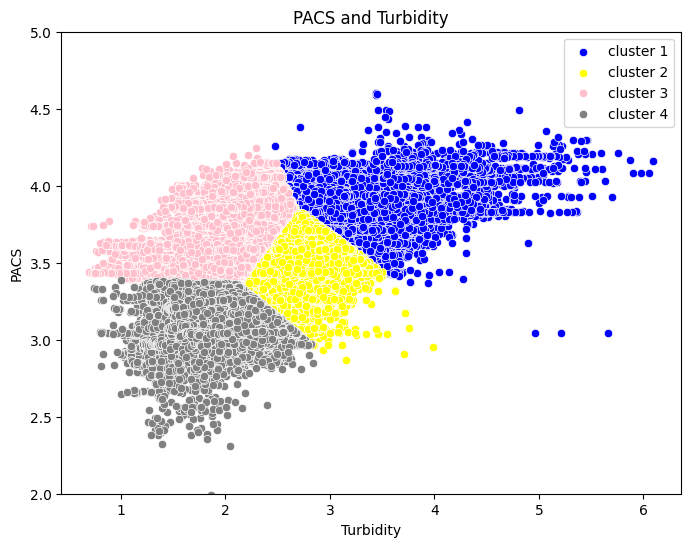

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df[df['Cluster']==0],  x='log탁도', y='log_pacs', marker='o', color='b', label = 'cluster 1')
sns.scatterplot(data=df[df['Cluster']==2], x='log탁도', y='log_pacs', marker='o', color='yellow', label = 'cluster 2')
sns.scatterplot(data=df[df['Cluster']==3], x='log탁도', y='log_pacs', marker='o', color='pink', label = 'cluster 3')
sns.scatterplot(data=df[df['Cluster']==1], x='log탁도', y='log_pacs', marker='o', color='grey', label = 'cluster 4')
plt.title('PACS and Turbidity')
plt.xlabel('Turbidity')
plt.ylabel('PACS')
plt.ylim(2, 5)
plt.legend()
plt.show()

In [ ]:
# Data extraction after clustering modeling
df.to_excel("data_cluster.xlsx", index = False)